# Imports

In [ ]:
from utils import test_model
from datamodule import VLASSLoader
import torch
from models.vit import ViT
from models.cnn import CNN, ResNet

In [2]:
# https://docs.pytorch.org/vision/0.21/models.html
import timm
print(timm.list_models('*swin*'))

['hiera_base_abswin_256', 'hiera_small_abswin_256', 'swin_base_patch4_window7_224', 'swin_base_patch4_window12_384', 'swin_large_patch4_window7_224', 'swin_large_patch4_window12_384', 'swin_s3_base_224', 'swin_s3_small_224', 'swin_s3_tiny_224', 'swin_small_patch4_window7_224', 'swin_tiny_patch4_window7_224', 'swinv2_base_window8_256', 'swinv2_base_window12_192', 'swinv2_base_window12to16_192to256', 'swinv2_base_window12to24_192to384', 'swinv2_base_window16_256', 'swinv2_cr_base_224', 'swinv2_cr_base_384', 'swinv2_cr_base_ns_224', 'swinv2_cr_giant_224', 'swinv2_cr_giant_384', 'swinv2_cr_huge_224', 'swinv2_cr_huge_384', 'swinv2_cr_large_224', 'swinv2_cr_large_384', 'swinv2_cr_small_224', 'swinv2_cr_small_384', 'swinv2_cr_small_ns_224', 'swinv2_cr_small_ns_256', 'swinv2_cr_tiny_224', 'swinv2_cr_tiny_384', 'swinv2_cr_tiny_ns_224', 'swinv2_large_window12_192', 'swinv2_large_window12to16_192to256', 'swinv2_large_window12to24_192to384', 'swinv2_small_window8_256', 'swinv2_small_window16_256',

# Load

Class type :

{   0: 'Extended',
    1: 'Point Source',
    2: 'Double Lobes',
    3: 'Three Points'
}

In [3]:
loader = VLASSLoader(root='./data')

loader.setup('fit')
val_dataloader = loader.val_dataloader()

Loading data from file: ./data\vlass_data_array.p
Loading labels from file: ./data\vlass_labels.p
61351 images, each of size 64 x 64 pixels.
There are 61351 corresponding labels - one category for each image.
Loading data from file: ./data\vlass_data_array.p
Loading labels from file: ./data\vlass_labels.p
61351 images, each of size 64 x 64 pixels.
There are 61351 corresponding labels - one category for each image.
Val size: 12271


# CNN

## No augmentation

In [7]:
model = CNN.load_from_checkpoint(
    'outputs/cnn/lightning_logs/version_7/checkpoints/epoch=6-step=5362.ckpt'
).cpu()
result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:10<00:00, 18.78it/s]


Accuracy = 0.8385962041884817, F1 = 0.7548070171650243
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      2622
           1       0.94      0.95      0.94      5162
           2       0.78      0.81      0.79      3311
           3       0.46      0.40      0.43      1129

    accuracy                           0.84     12224
   macro avg       0.76      0.75      0.75     12224
weighted avg       0.83      0.84      0.84     12224

Confusion Matrix:
 [[2235   13   84  290]
 [  23 4896  223   20]
 [ 129  293 2670  219]
 [ 211   28  440  450]]


## Augmented

In [17]:
model = CNN.load_from_checkpoint(
    'outputs/cnn/lightning_logs/version_12/checkpoints/epoch=9-step=7660.ckpt'
).cpu()
result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:11<00:00, 16.08it/s]

Accuracy = 0.8318, F1 = 0.6445
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2622
           1       0.92      0.96      0.94      5162
           2       0.73      0.83      0.78      3311
           3       0.00      0.00      0.00      1129

    accuracy                           0.83     12224
   macro avg       0.61      0.68      0.64     12224
weighted avg       0.76      0.83      0.79     12224

Confusion Matrix:
 [[2453   15  154    0]
 [  27 4977  158    0]
 [ 194  379 2738    0]
 [ 426   24  679    0]]


# ResNet

## Full-tuned, no augmentation

In [ ]:
model = ResNet.load_from_checkpoint(
    'outputs/resnet/lightning_logs/version_1/checkpoints/epoch=2-step=2298.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]}, F1 = {result["f1"]}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

Accuracy = 0.8808082460732984, F1 = 0.8135616403993511
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      2622
           1       0.96      0.96      0.96      5162
           2       0.83      0.86      0.85      3311
           3       0.62      0.49      0.55      1129

    accuracy                           0.88     12224
   macro avg       0.82      0.81      0.81     12224
weighted avg       0.88      0.88      0.88     12224

Confusion Matrix:
 [[2417    6   56  143]
 [  11 4937  208    6]
 [  93  175 2855  188]
 [ 248    4  319  558]]


## Frozen, no augmentation

In [6]:
model = ResNet.load_from_checkpoint(
    'outputs/resnet/lightning_logs/version_3/checkpoints/epoch=9-step=7660.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]}, F1 = {result["f1"]}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:18<00:00, 10.14it/s]

Accuracy = 0.7378108638743456, F1 = 0.6014379876685579
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      2622
           1       0.81      0.91      0.86      5162
           2       0.61      0.63      0.62      3311
           3       0.36      0.08      0.13      1129

    accuracy                           0.74     12224
   macro avg       0.64      0.61      0.60     12224
weighted avg       0.71      0.74      0.71     12224

Confusion Matrix:
 [[2179   81  294   68]
 [  90 4677  380   15]
 [ 248  910 2072   81]
 [ 328   81  629   91]]


## Full-tuned, augmented

In [ ]:
model = ResNet.load_from_checkpoint(
    'outputs/resnet/lightning_logs/version_5/checkpoints/epoch=7-step=6128.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]}, F1 = {result["f1"]}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:49<00:00,  3.86it/s]


Accuracy = 0.9016688481675392, F1 = 0.8448609543790737
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      2622
           1       0.96      0.97      0.97      5162
           2       0.88      0.88      0.88      3311
           3       0.65      0.59      0.62      1129

    accuracy                           0.90     12224
   macro avg       0.85      0.84      0.84     12224
weighted avg       0.90      0.90      0.90     12224

Confusion Matrix:
 [[2409    2   38  173]
 [   9 5032  113    8]
 [  42  176 2916  177]
 [ 194   17  253  665]]


# MobileNet

In [3]:
model = ResNet.load_from_checkpoint(
    './outputs/mobilenet/lightning_logs/version_4795120/checkpoints/epoch=9-step=7660.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:04<00:00, 46.62it/s]


Accuracy = 0.8855, F1 = 0.8189
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2622
           1       0.95      0.97      0.96      5162
           2       0.84      0.88      0.85      3311
           3       0.65      0.49      0.56      1129

    accuracy                           0.89     12224
   macro avg       0.83      0.81      0.82     12224
weighted avg       0.88      0.89      0.88     12224

Confusion Matrix:
 [[2391    9   58  164]
 [  15 4982  161    4]
 [  63  222 2898  128]
 [ 206   18  352  553]]


# EfficientNet

In [4]:
model = ResNet.load_from_checkpoint(
    './outputs/efficientnet/lightning_logs/version_0/checkpoints/epoch=1-step=1532.ckpt'
).cuda()

In [7]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

10701660

In [4]:
model = ResNet.load_from_checkpoint(
    './outputs/efficientnet/lightning_logs/version_4795120/checkpoints/epoch=2-step=2298.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:06<00:00, 29.80it/s]


Accuracy = 0.8337, F1 = 0.7485
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      2622
           1       0.93      0.92      0.93      5162
           2       0.73      0.84      0.78      3311
           3       0.53      0.34      0.42      1129

    accuracy                           0.83     12224
   macro avg       0.77      0.74      0.75     12224
weighted avg       0.83      0.83      0.83     12224

Confusion Matrix:
 [[2237   28  164  193]
 [  13 4774  369    6]
 [  88  283 2791  149]
 [ 201   24  515  389]]


# ViT

## Full-tuned, no augmentation

In [11]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_2/checkpoints/epoch=2-step=2298.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:48<00:00,  3.95it/s]

Accuracy = 0.9154, F1 = 0.8693
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2622
           1       0.98      0.97      0.97      5162
           2       0.87      0.92      0.90      3311
           3       0.68      0.68      0.68      1129

    accuracy                           0.92     12224
   macro avg       0.87      0.87      0.87     12224
weighted avg       0.92      0.92      0.92     12224

Confusion Matrix:
 [[2364    9   46  203]
 [   0 5011  146    5]
 [  15  100 3049  147]
 [ 110    7  246  766]]


## Frozen, no augmentation

In [3]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_3/checkpoints/epoch=8-step=6894.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [01:03<00:00,  3.02it/s]

Accuracy = 0.8400, F1 = 0.7332
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      2622
           1       0.94      0.95      0.94      5162
           2       0.74      0.84      0.79      3311
           3       0.50      0.25      0.33      1129

    accuracy                           0.84     12224
   macro avg       0.76      0.73      0.73     12224
weighted avg       0.83      0.84      0.83     12224

Confusion Matrix:
 [[2332   17  125  148]
 [  13 4884  262    3]
 [ 128  282 2773  128]
 [ 242   23  585  279]]


## Vit-Base

In [9]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_4795120/checkpoints/epoch=8-step=6894.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:09<00:00, 19.49it/s]

Accuracy = 0.9185, F1 = 0.8790
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2622
           1       0.98      0.96      0.97      5162
           2       0.88      0.93      0.90      3311
           3       0.68      0.75      0.71      1129

    accuracy                           0.92     12224
   macro avg       0.88      0.88      0.88     12224
weighted avg       0.92      0.92      0.92     12224

Confusion Matrix:
 [[2356    5   36  225]
 [   1 4959  193    9]
 [  16   65 3063  167]
 [  99    7  173  850]]


## Full-tuned, augmented

In [23]:
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_5/checkpoints/epoch=6-step=5362.ckpt'
).cpu()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [01:19<00:00,  2.41it/s]

Accuracy = 0.9250, F1 = 0.8832
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2622
           1       0.98      0.97      0.98      5162
           2       0.91      0.91      0.91      3311
           3       0.70      0.72      0.71      1129

    accuracy                           0.92     12224
   macro avg       0.88      0.89      0.88     12224
weighted avg       0.93      0.92      0.93     12224

Confusion Matrix:
 [[2480    5   17  120]
 [   1 5016  139    6]
 [  26   72 2999  214]
 [ 185    3  129  812]]


# SwinViT

## No Augmentation

In [6]:
model = ViT.load_from_checkpoint(
    'outputs/swin/lightning_logs/version_4817511/checkpoints/epoch=3-step=3064.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

/home/mi3se/.conda/envs/astroclip/lib/python3.10/site-packages/timm/layers/interpolate.py:47: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  idx_right = torch.bucketize(x, p)
100%|██████████| 191/191 [00:10<00:00, 18.11it/s]


Accuracy = 0.8929, F1 = 0.8310
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2622
           1       0.95      0.98      0.96      5162
           2       0.86      0.87      0.86      3311
           3       0.65      0.53      0.59      1129

    accuracy                           0.89     12224
   macro avg       0.84      0.82      0.83     12224
weighted avg       0.89      0.89      0.89     12224

Confusion Matrix:
 [[2377    8   64  173]
 [   4 5054  102    2]
 [  45  241 2880  145]
 [ 180   28  317  604]]


## With Augmentation

In [8]:
model = ViT.load_from_checkpoint(
    'outputs/swin/lightning_logs/version_4817511/checkpoints/epoch=3-step=3064-v1.ckpt'
).cuda()

result = test_model(model, val_dataloader)

print(f'Accuracy = {result["accuracy"]:.4f}, F1 = {result["f1"]:.4f}')
print('Classification report:\n', result['classification_report'])
print('Confusion Matrix:\n', result['confusion_matrix'])

100%|██████████| 191/191 [00:04<00:00, 39.44it/s]


Accuracy = 0.8955, F1 = 0.8349
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2622
           1       0.95      0.97      0.96      5162
           2       0.84      0.90      0.87      3311
           3       0.67      0.53      0.59      1129

    accuracy                           0.90     12224
   macro avg       0.85      0.83      0.83     12224
weighted avg       0.89      0.90      0.89     12224

Confusion Matrix:
 [[2386    8   47  181]
 [   3 4997  161    1]
 [  28  207 2966  110]
 [ 160   21  350  598]]


# Interpret

In [6]:
batch = next(iter(val_dataloader))

## Black-box

In [4]:
from captum.attr import IntegratedGradients, GradientShap, FeatureAblation

from models.vit import ViT
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_5/checkpoints/epoch=6-step=5362.ckpt'
).cuda()

ig = IntegratedGradients(model)

In [7]:
with torch.no_grad():
    outputs = model(batch[0].cuda())
    predicted_labels = torch.argmax(outputs, dim=1)

In [29]:
attr = ig.attribute(
    batch[0][:8].cuda(), target=predicted_labels[:8].cuda(), 
    baselines=torch.zeros_like(batch[0][:8].cuda())
)

In [13]:
def min_max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())

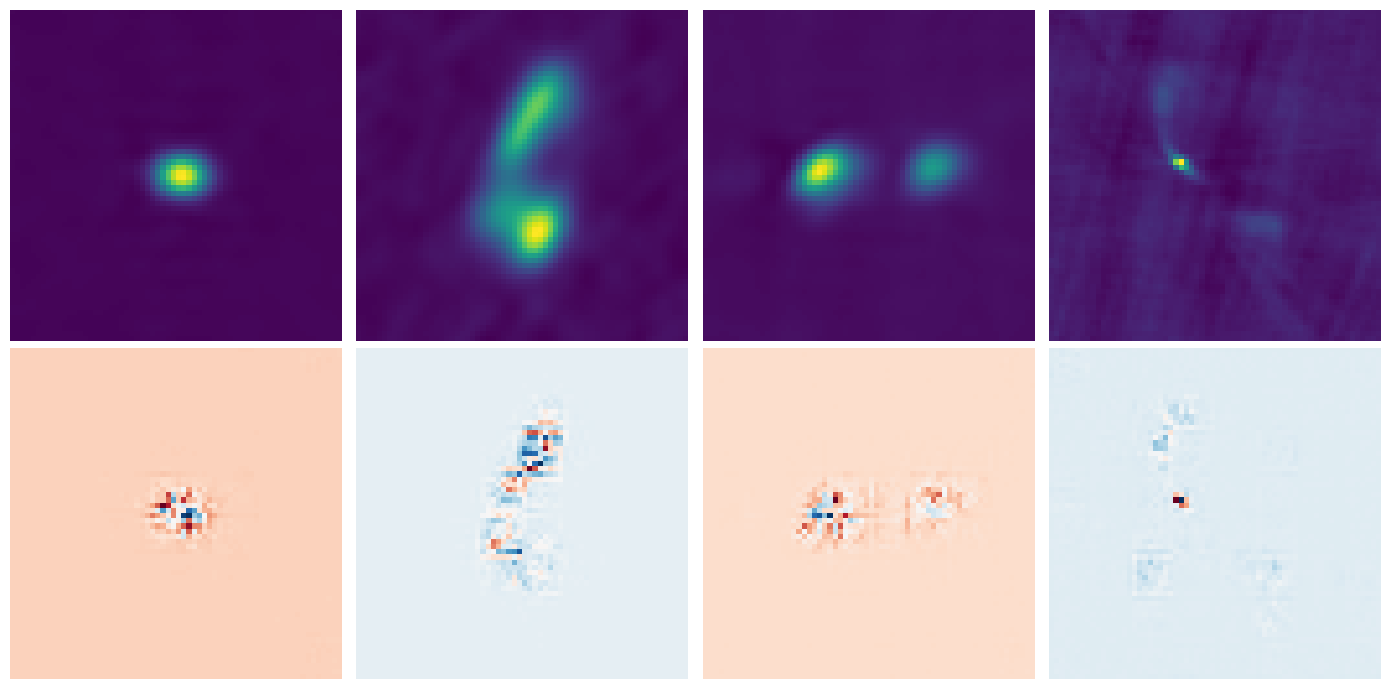

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(14, 7))

for i in range(4):
    ax1, ax2 = axes[0][i], axes[1][i]
    ax1.imshow(batch[0][i+4].T.numpy())
    # ax1.set_title(f'Image {i+1}, Raw')
    ax1.grid(False)
    ax1.axis('off')
    
    ax2.imshow(min_max_normalize(attr[i+4]).T.cpu().numpy(), cmap='RdBu')
    # ax2.set_title(f'Image {i+1}, Interpretation')
    ax2.grid(False)
    ax2.axis('off')

plt.tight_layout()
# plt.savefig('plots/ig2.jpg', bbox_inches='tight', dpi=200)
plt.show()

## Attention

### Utils

In [38]:
import timm
from timm.utils import AttentionExtract
from torch.nn import functional as F
import matplotlib.pyplot as plt
from PIL import Image

timm.layers.set_fused_attn(False)

In [39]:
from typing import List, Tuple, Dict
import numpy as np
import torch

def process_image(
        image: torch.Tensor,
        extractor: AttentionExtract
) -> Dict[str, torch.Tensor]:
    """Process the input image and get the attention maps."""
    # Extract attention maps
    attention_maps = extractor(image.unsqueeze(0))
    
    return attention_maps

def apply_mask(image: np.ndarray, mask: np.ndarray, color: Tuple[float, float, float], alpha: float = 0.5) -> np.ndarray:
    # Ensure mask and image have the same shape
    mask = mask[:, :, np.newaxis]
    mask = np.repeat(mask, 3, axis=2)
    
    # Convert color to numpy array
    color = np.array(color)
    
    # Apply mask
    masked_image = image * (1 - alpha * mask) + alpha * mask * color[np.newaxis, np.newaxis, :] * 255
    return masked_image.astype(np.uint8)

In [40]:
def rollout(attentions, discard_ratio, head_fusion, num_prefix_tokens=1):
    # based on https://github.com/jacobgil/vit-explain/blob/main/vit_rollout.py
    result = torch.eye(attentions[0].size(-1), device=attentions[0].device)
    with torch.no_grad():
        for attention in attentions:
            if head_fusion.startswith('mean'):
                # mean_std fusion doesn't appear to make sense with rollout
                attention_heads_fused = attention.mean(dim=0)
            elif head_fusion == "max":
                attention_heads_fused = attention.amax(dim=0)
            elif head_fusion == "min":
                attention_heads_fused = attention.amin(dim=0)
            else:
                raise ValueError("Attention head fusion type Not supported")

            # Discard the lowest attentions, but don't discard the prefix tokens
            flat = attention_heads_fused.view(-1)
            _, indices = flat.topk(int(flat.size(-1 )* discard_ratio), -1, False)
            indices = indices[indices >= num_prefix_tokens]
            flat[indices] = 0

            I = torch.eye(attention_heads_fused.size(-1), device=attention_heads_fused.device)
            a = (attention_heads_fused + 1.0 * I) / 2
            a = a / a.sum(dim=-1)
            result = torch.matmul(a, result)
    
    # Look at the total attention between the prefix tokens (usually class tokens)
    # and the image patches    
    # FIXME this is token 0 vs non-prefix right now, need to cover other cases (> 1 prefix, no prefix, etc)
    mask = result[0, num_prefix_tokens:]
    width = int(mask.size(-1) ** 0.5)
    mask = mask.reshape(width, width).detach().cpu().numpy()
    mask = mask / np.max(mask)
    return mask


### Single Image

In [41]:
# https://huggingface.co/spaces/timm/timmAttentionViz/blob/main/app.py
model = ViT.load_from_checkpoint(
    'outputs/vit/lightning_logs/version_5/checkpoints/epoch=6-step=5362.ckpt'
).cuda()

# verify that fused_attn is False, so that we use 
# softmax in attention, instead of scaled dot product attention
print(model.backbone.blocks[-1].attn.fused_attn)

num_prefix_tokens = getattr(model, 'num_prefix_tokens', 1)  # Default to 1 class token if not specified
print(num_prefix_tokens)

False
1


In [42]:
extractor = AttentionExtract(model.backbone, method='fx')
attention_maps = process_image(batch[0][0].cuda(), extractor)

In [ ]:
# convert from CHW to HWC
image_np = batch[0][0].permute(1, 2, 0).numpy()

1


Attention map shape for blocks.0.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.1.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.2.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.3.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.4.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.5.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.6.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.7.attn.softmax: torch.Size([1, 3, 65, 65])


C:\Users\mi3se\AppData\Local\Temp\ipykernel_524\2895607112.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attn_map = torch.tensor(attn_map).unsqueeze(0).unsqueeze(0)


Attention map shape for blocks.8.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.9.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.10.attn.softmax: torch.Size([1, 3, 65, 65])
Attention map shape for blocks.11.attn.softmax: torch.Size([1, 3, 65, 65])


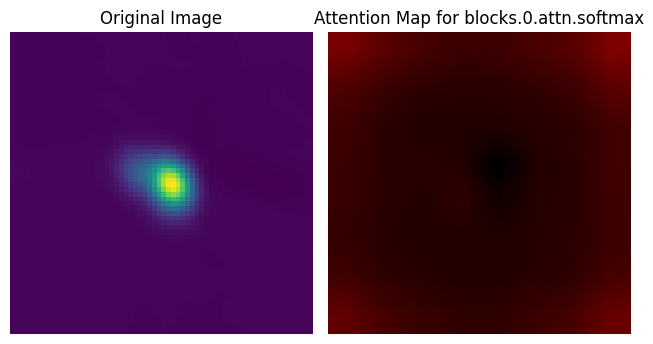

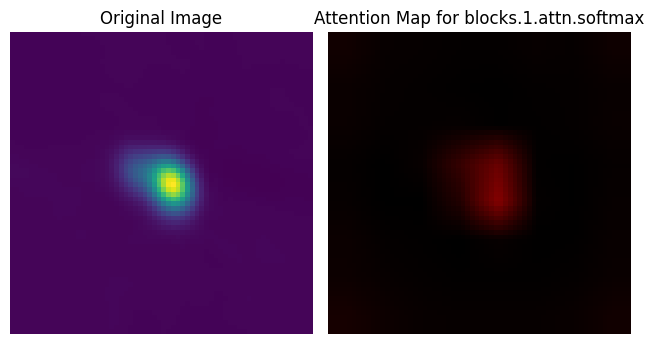

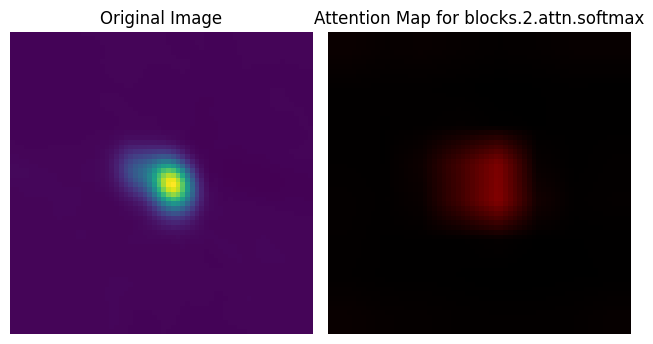

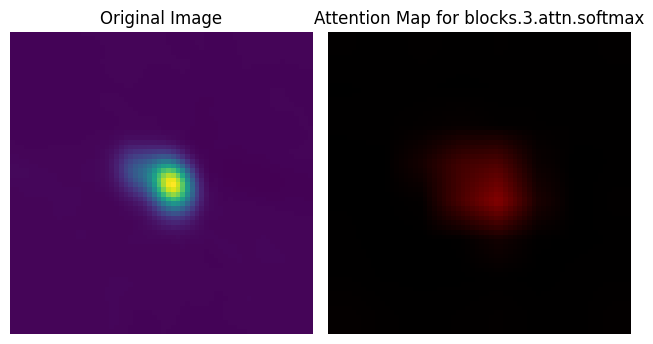

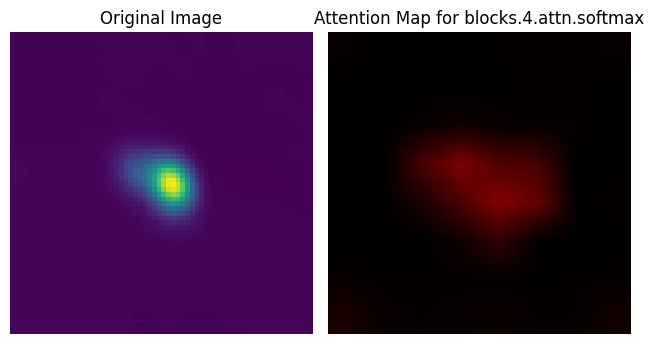

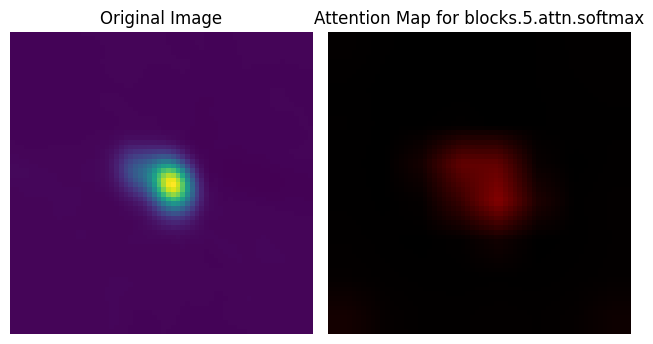

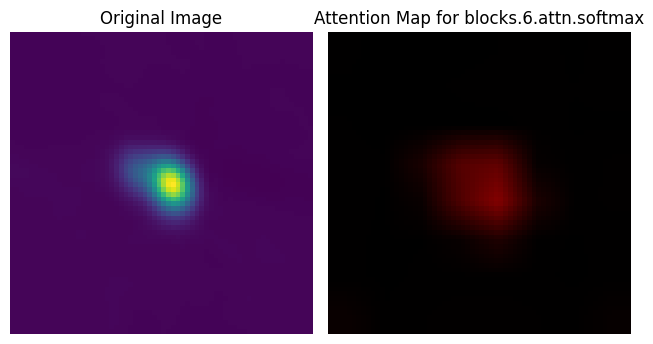

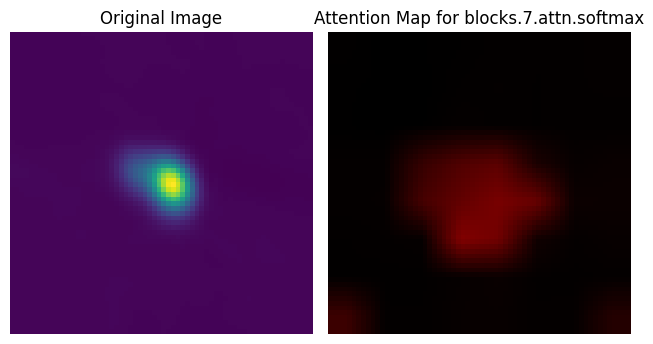

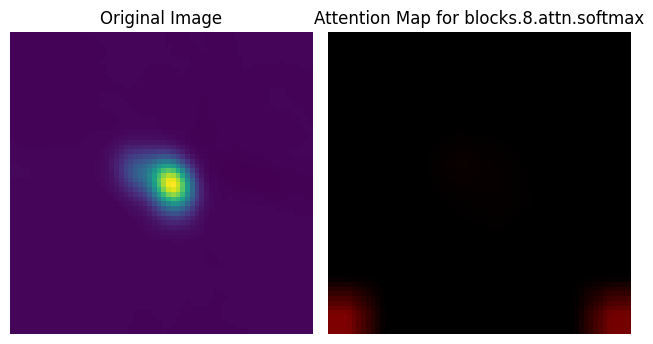

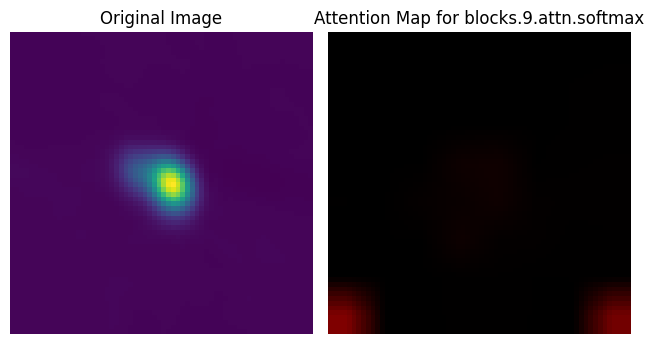

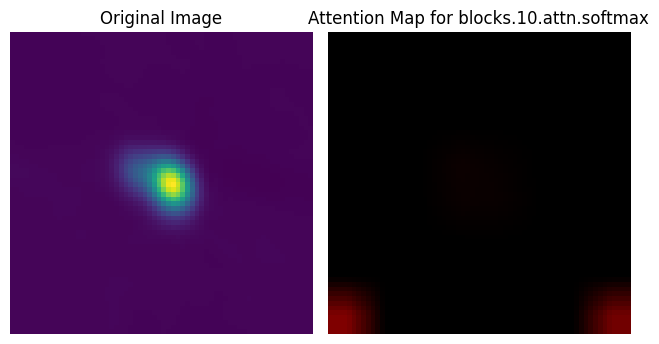

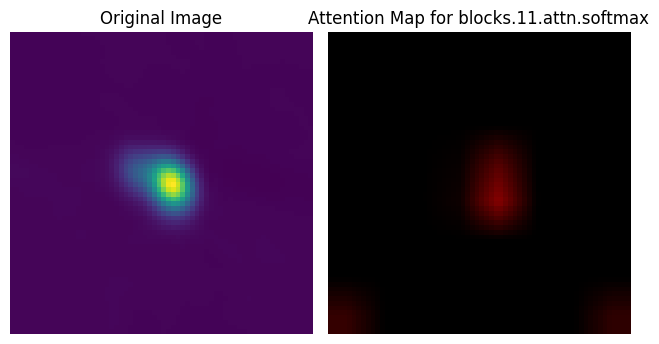

In [ ]:
# Create visualizations
visualizations = []
attentions_for_rollout = []
head_fusion = 'mean'

for layer_name, attn_map in attention_maps.items():
    print(f"Attention map shape for {layer_name}: {attn_map.shape}")
    attn_map = attn_map[0]  # Remove batch dimension

    attentions_for_rollout.append(attn_map)

    attn_map = attn_map[:, :, num_prefix_tokens:]  # Remove prefix tokens for visualization

    if head_fusion == 'mean_std':                
        attn_map = attn_map.mean(0) / attn_map.std(0)
    elif head_fusion == 'mean':
        attn_map = attn_map.mean(0)
    elif head_fusion == 'max':
        attn_map = attn_map.amax(0)
    elif head_fusion == 'min':
        attn_map = attn_map.amin(0)
    else:
        raise ValueError(f"Invalid head fusion method: {head_fusion}")

    # Use the first token's attention (usually the class token)
    # FIXME handle different prefix token scenarios
    attn_map = attn_map[0]

    # Reshape the attention map to 2D
    num_patches = int(attn_map.shape[0] ** 0.5)
    attn_map = attn_map.reshape(num_patches, num_patches)

    # Interpolate to match image size
    attn_map = torch.tensor(attn_map).unsqueeze(0).unsqueeze(0)
    attn_map = F.interpolate(attn_map, size=(image_np.shape[0], image_np.shape[1]), mode='bilinear', align_corners=False)
    attn_map = attn_map.squeeze().cpu().numpy()

    # Normalize attention map
    attn_map = (attn_map - attn_map.min()) / (attn_map.max() - attn_map.min())

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.5, 3.5))

    # Original image
    ax1.imshow(image_np)
    ax1.set_title("Original Image")
    ax1.axis('off')

    # Attention map overlay
    masked_image = apply_mask(image_np, attn_map, color=(1, 0, 0))  # Red mask
    ax2.imshow(masked_image)
    ax2.set_title(f'Attention Map for {layer_name}')
    ax2.axis('off')

    plt.tight_layout()

    # Convert plot to image
    # fig.canvas.draw()
    # vis_image = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.buffer_rgba())
    # visualizations.append(vis_image)
    # plt.close(fig)

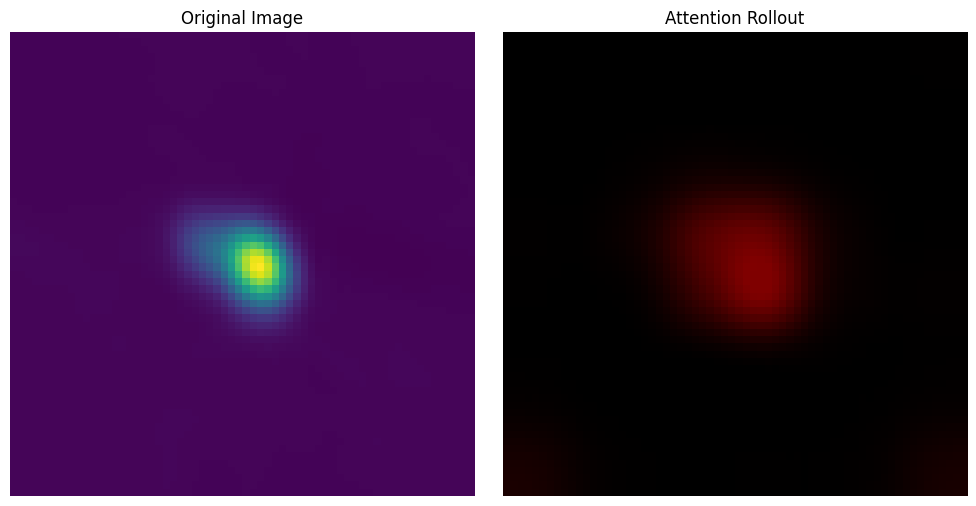

In [ ]:
# Calculate rollout
discard_ratio = 0.1
rollout_mask = rollout(attentions_for_rollout, discard_ratio, head_fusion, num_prefix_tokens)

# Create rollout visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax1.imshow(image_np)
ax1.set_title("Original Image")
ax1.axis('off')

# Rollout overlay
rollout_mask_pil = Image.fromarray((rollout_mask * 255).astype(np.uint8))
rollout_mask_resized = np.array(rollout_mask_pil.resize((image_np.shape[1], image_np.shape[0]), Image.BICUBIC)) / 255.0
masked_image = apply_mask(image_np, rollout_mask_resized, color=(1, 0, 0))  # Red mask
ax2.imshow(masked_image)
ax2.set_title('Attention Rollout')
ax2.axis('off')

plt.tight_layout()

## Multiple Images

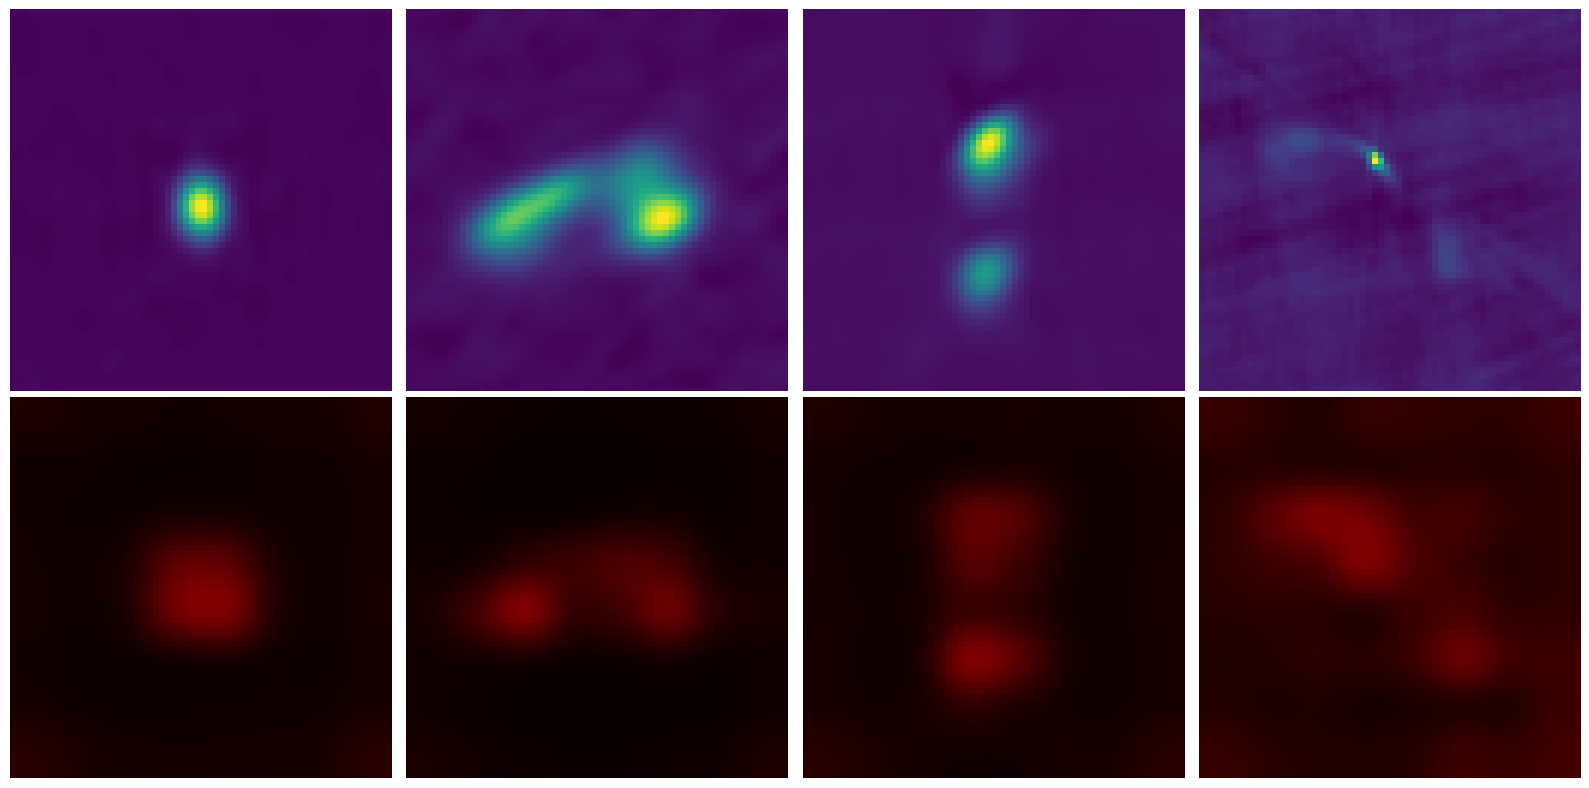

In [44]:
discard_ratio = 0.1
count = 4
fig, axes = plt.subplots(2, count, figsize=(16, 8))

for i, image in enumerate(batch[0][4:count+4]):
    attention_maps = process_image(image.cuda(), extractor)
    image_np = image.permute(1, 2, 0).detach().cpu().numpy()
    
    visualizations = []
    attentions_for_rollout = []
    head_fusion = 'mean'
    for layer_name, attn_map in attention_maps.items():
        attentions_for_rollout.append(attn_map[0])
        
    # Calculate rollout
   
    rollout_mask = rollout(attentions_for_rollout, discard_ratio, head_fusion, num_prefix_tokens)

    # Create rollout visualization
    (ax1, ax2) = (axes[0][i], axes[1][i]) # plt.subplots(1, 2, figsize=(6, 3.5))

    # Original image
    ax1.imshow(image_np)
    # ax1.set_title("Original Image")
    ax1.axis('off')

    # Rollout overlay
    rollout_mask_pil = Image.fromarray((rollout_mask * 255).astype(np.uint8))
    rollout_mask_resized = np.array(rollout_mask_pil.resize((image_np.shape[1], image_np.shape[0]), Image.BICUBIC)) / 255.0
    masked_image = apply_mask(image_np, rollout_mask_resized, color=(1, 0, 0))  # Red mask
    ax2.imshow(masked_image)
    # ax2.set_title('Attention Rollout')
    ax2.axis('off')

plt.tight_layout()
plt.savefig('plots/attention_rollout2.jpg', bbox_inches='tight', dpi=300)
plt.show()

# Plot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('results.csv')

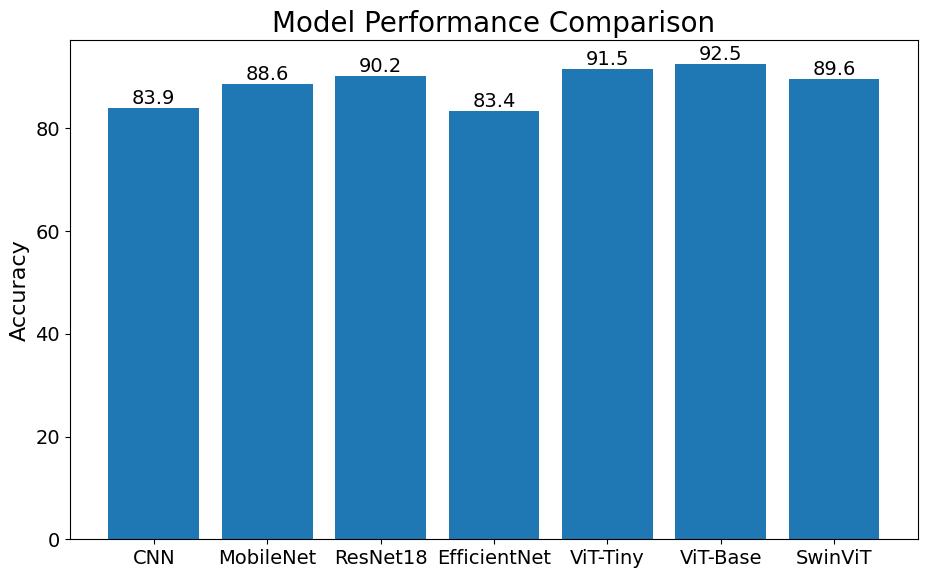

In [61]:
plt.figure(figsize=(9.5, 6))
plt.bar(df['model'], df['accuracy'])
# plt.xlabel('Model')
plt.rcParams.update({'font.size': 14})
plt.ylabel('Accuracy', fontsize=16)
plt.title('Model Performance Comparison', fontsize=20)
for i, v in enumerate(df['accuracy']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# plt.xticks(rotation=15)
plt.tight_layout()
# plt.ylim(80, 94)
plt.savefig('plots/accuracy.jpg', bbox_inches='tight', dpi=200)
plt.show()

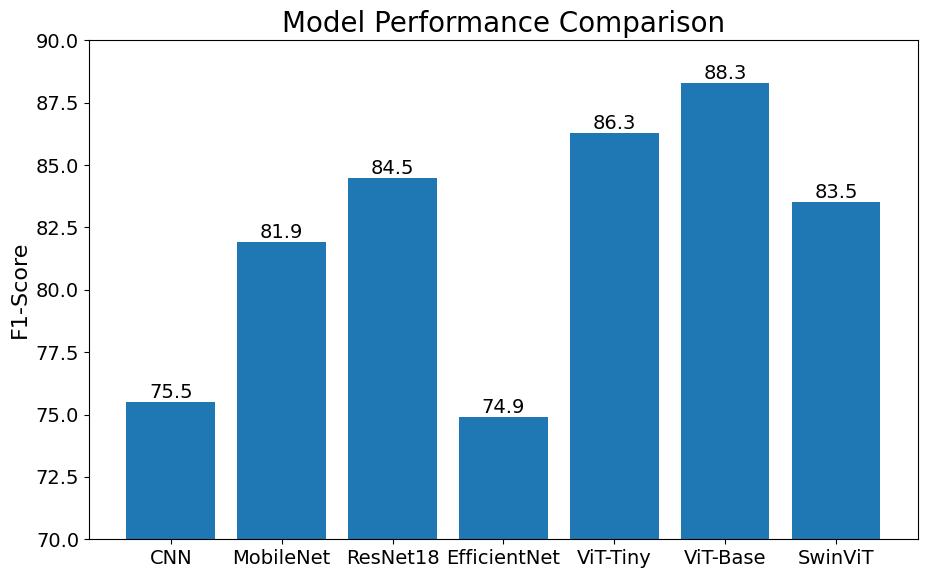

In [58]:
plt.figure(figsize=(9.5, 6))
plt.bar(df['model'], df['f1_score'])
# plt.xlabel('Model')
plt.rcParams.update({'font.size': 14})
plt.ylabel('F1-Score', fontsize=16)
plt.title('Model Performance Comparison', fontsize=20)
for i, v in enumerate(df['f1_score']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# plt.ylim(70, 90)
plt.tight_layout()
plt.savefig('plots/f1_score.jpg', bbox_inches='tight', dpi=200)
plt.show()

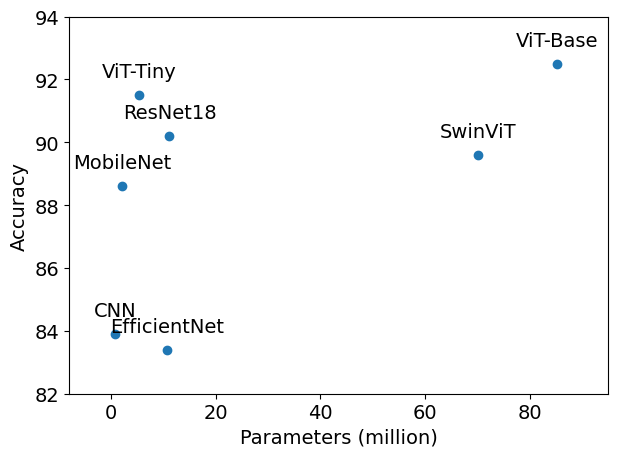

In [51]:
plt.scatter(df['parameters'], df['accuracy'])
plt.xlabel('Parameters (million)')
plt.ylabel('Accuracy')

for i, txt in enumerate(df['model']):
    plt.annotate(
        txt, (df['parameters'][i], df['accuracy'][i]),
        textcoords="offset points", xytext=(0,10),
        ha='center', va='bottom'
    )
plt.xlim(-8, 95)
plt.ylim(82, 94)
plt.tight_layout()
plt.savefig('plots/accuracy_vs_parameters.jpg', bbox_inches='tight', dpi=200)
plt.show()

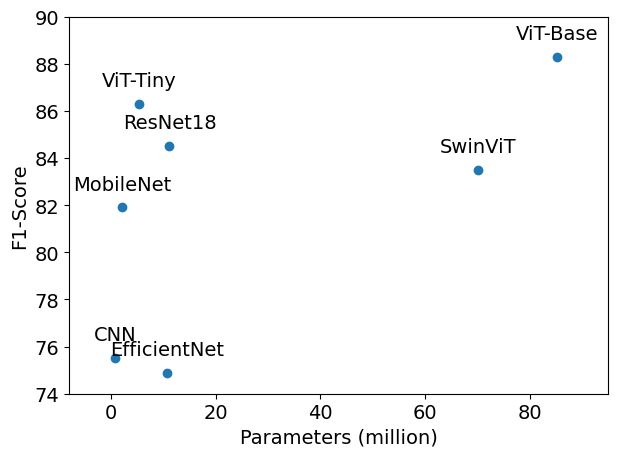

In [55]:
plt.scatter(df['parameters'], df['f1_score'])
plt.xlabel('Parameters (million)')
plt.ylabel('F1-Score')

for i, txt in enumerate(df['model']):
    plt.annotate(
        txt, (df['parameters'][i], df['f1_score'][i]),
        textcoords="offset points", xytext=(0,10),
        ha='center', va='bottom'
    )
plt.xlim(-8, 95)
plt.ylim(74, 90)
plt.tight_layout()
plt.savefig('plots/f1_score_vs_parameters.jpg', bbox_inches='tight', dpi=200)
plt.show()